In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import geopandas as gpd
import descartes
from shapely.geometry import Point , Polygon

import folium
from folium import plugins
import json


In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import helper as H
import plot_helper as P

In [3]:
# read 2 rows of the file before loading it
!head -2 ../data/incident_reports.csv

Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
2018/01/01 09:26:00 AM,2018/01/01,09:26,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,171052174,173641140,VS,Vehicle Supplement,,07041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,03RD ST \ HOLLISTER AVE,20471000,Southern,Bayview Hunters Point,10,37.72171587946975,-122.39594382884452,"(37.72171587946975, -122.39594382884452)"


In [4]:
police_df = pd.read_csv('../data/incident_reports.csv')

In [5]:
police_df.head(2)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
0,2018/01/01 09:26:00 AM,2018/01/01,09:26,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,171052174,173641140.0,...,"Vehicle, Recovered, Auto",Open or Active,03RD ST \ HOLLISTER AVE,20471000.0,Southern,Bayview Hunters Point,10.0,37.721716,-122.395944,"(37.72171587946975, -122.39594382884452)"
1,2018/01/01 02:30:00 AM,2018/01/01,02:30,2018,Monday,2018/01/01 08:21:00 AM,61893105041,618931,180000768,180010668.0,...,"Burglary, Residence, Forcible Entry",Open or Active,LISBON ST \ PERSIA AVE,21719000.0,Ingleside,Excelsior,11.0,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)"


In [6]:
# replace NaN values with 0
police_df= police_df.fillna(0)

In [7]:
unwanted= ['Incident Datetime', 'Report Type Code' , 'Report Type Description' , 'CAD Number' , 'CNN', 
                              'Supervisor District' , 'Resolution', 'Filed Online', 'Incident Number',
                              'Incident Code' , 'Police District']
extract= H.extract_df(police_df, unwanted)

In [8]:
extract.head(2)

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,2018/01/01,09:26,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",03RD ST \ HOLLISTER AVE,Bayview Hunters Point,37.721716,-122.395944,"(37.72171587946975, -122.39594382884452)"
1,2018/01/01,02:30,2018,Monday,2018/01/01 08:21:00 AM,61893105041,618931,Burglary,Burglary - Residential,"Burglary, Residence, Forcible Entry",LISBON ST \ PERSIA AVE,Excelsior,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)"


In [9]:
extract = H.to_datetime(extract,'Incident Date' , 'Incident Time')

In [10]:
extract.head(2)

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,2018-01-01,1900-01-01 09:26:00,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",03RD ST \ HOLLISTER AVE,Bayview Hunters Point,37.721716,-122.395944,"(37.72171587946975, -122.39594382884452)"
1,2018-01-01,1900-01-01 02:30:00,2018,Monday,2018/01/01 08:21:00 AM,61893105041,618931,Burglary,Burglary - Residential,"Burglary, Residence, Forcible Entry",LISBON ST \ PERSIA AVE,Excelsior,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)"


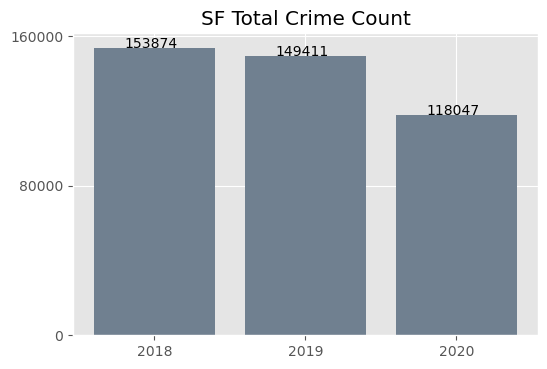

In [11]:
H.plot_crime_per_year(extract, [2018,2019, 2020], 'Incident Year');

In [12]:
df_2018 = H.crime_per_year(extract, 2018, 'Incident Year')

In [13]:
df_2019 = H.crime_per_year(extract , 2019, 'Incident Year')

In [14]:
df_2020 = H.crime_per_year(extract , 2020, 'Incident Year')

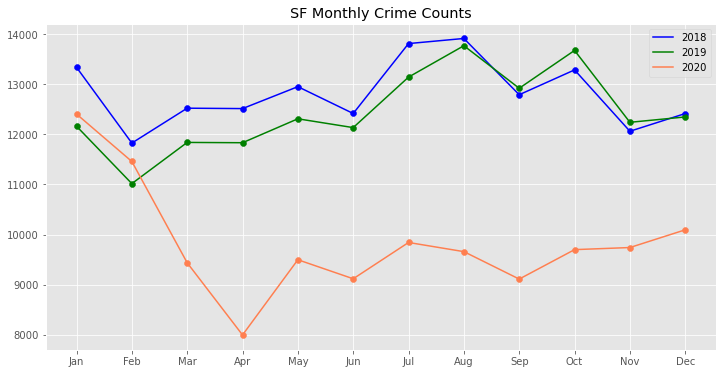

In [20]:
# plotting crime per month
P.plot_crime_by_month(extract , 'Incident Date');

In [ ]:
# counts per category for each year (3 subplots)

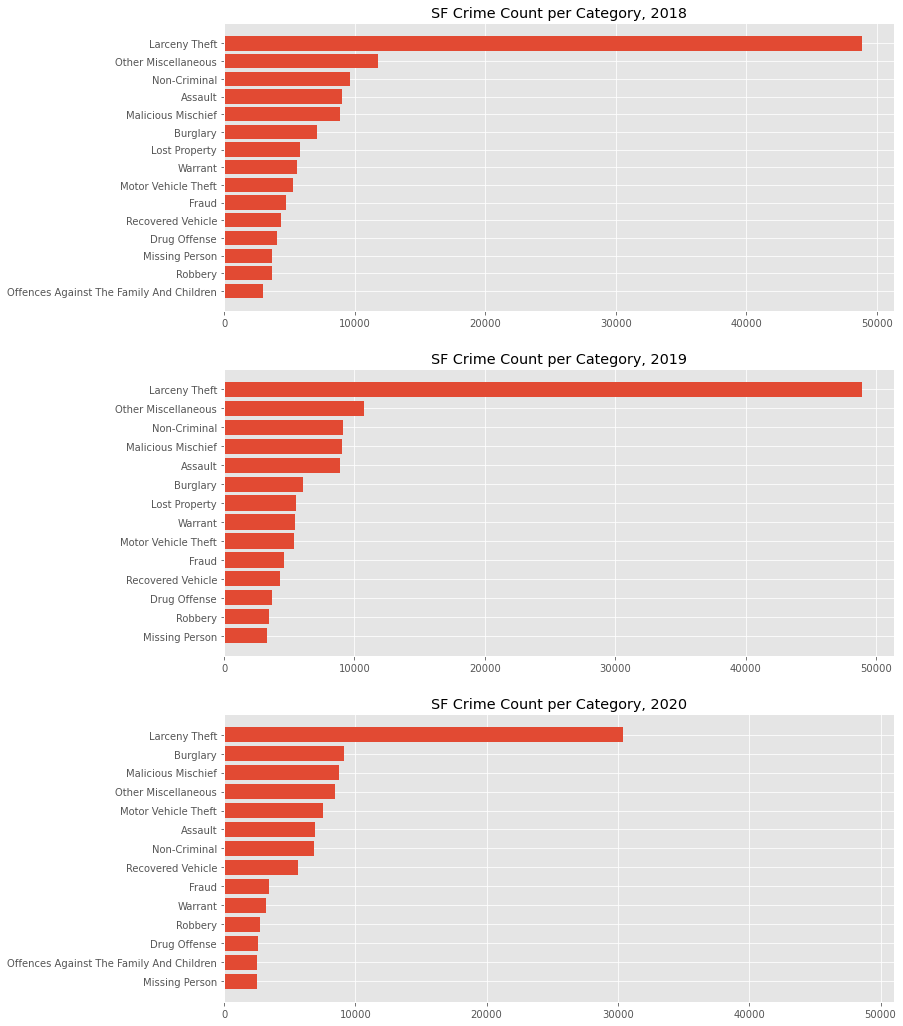

In [84]:
P.plot_cats_per_year(extract , 'Incident Date', 'Incident Category');

In [ ]:
# comparing 3 years , voilent vs property

In [101]:
violent_df= H.violent_(extract)

In [102]:
violent_df

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,2018-01-01,1900-01-01 01:30:00,2018,Monday,2018/01/01 01:44:00 AM,61893704136,618937,Assault,Simple Assault,Battery with Serious Injuries,CALIFORNIA ST \ DRUMM ST,Financial District/South Beach,37.793664,-122.396390,"(37.793663777154755, -122.39639041612962)"
1,2018-01-01,1900-01-01 09:00:00,2018,Monday,2018/01/01 10:14:00 AM,61894004013,618940,Assault,Aggravated Assault,"Assault, Aggravated, W/ Other Weapon",LAKEVIEW AVE \ MAJESTIC AVE,Oceanview/Merced/Ingleside,37.716978,-122.451895,"(37.7169775067907, -122.45189499287864)"
2,2018-01-01,1900-01-01 10:45:00,2018,Monday,2018/01/01 11:30:00 AM,61894803044,618948,Robbery,Robbery - Commercial,"Robbery, Chain Store, W/ Force",OFARRELL ST \ SECURITY PACIFIC PL,Financial District/South Beach,37.786748,-122.405346,"(37.786747617678444, -122.40534607993492)"
3,2018-01-01,1900-01-01 13:45:00,2018,Monday,2018/01/01 03:15:00 PM,61900304013,619003,Assault,Aggravated Assault,"Assault, Aggravated, W/ Other Weapon",GENEVA AVE \ NAPLES ST,Excelsior,37.714209,-122.436176,"(37.714209482735754, -122.43617646639477)"
4,2018-01-01,1900-01-01 14:15:00,2018,Monday,2018/01/01 02:51:00 PM,61900504138,619005,Assault,Simple Assault,"Battery, former Spouse or Dating Relationship",SOUTH VAN NESS AVE \ 26TH ST,Mission,37.749172,-122.415955,"(37.749172182064, -122.41595464350685)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62150,2020-11-24,1900-01-01 21:41:00,2020,Tuesday,2020/11/24 09:41:00 PM,101580815200,1015808,Offences Against The Family And Children,Other,Domestic Violence (secondary only),FILLMORE ST \ TURK ST,Western Addition,37.780496,-122.432140,"(37.78049625961115, -122.43214039079034)"
62151,2021-03-24,1900-01-01 05:44:00,2021,Wednesday,2021/03/24 05:46:00 AM,101573803071,1015738,Robbery,Robbery - Other,"Robbery, W/ Gun",ARGUELLO BLVD \ LAKE ST,Presidio Heights,37.786914,-122.459280,"(37.78691386952736, -122.45927952860882)"
62152,2021-03-24,1900-01-01 08:59:00,2021,Wednesday,2021/03/24 08:59:00 AM,101580616010,1015806,Drug Offense,Drug Violation,Marijuana Offense,HILL ST \ SANCHEZ ST,Noe Valley,37.755556,-122.430038,"(37.75555614570098, -122.43003800709896)"
62153,2021-03-22,1900-01-01 07:52:00,2021,Monday,2021/03/22 07:57:00 AM,101573604013,1015736,Assault,Aggravated Assault,"Assault, Aggravated, W/ Other Weapon",WASHINGTON ST \ POLK ST,Russian Hill,37.793258,-122.421230,"(37.7932578668955, -122.42122998219767)"


In [103]:
property_df= H.property_(extract)

In [104]:
property_df

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,2018-01-01,1900-01-01 02:30:00,2018,Monday,2018/01/01 08:21:00 AM,61893105041,618931,Burglary,Burglary - Residential,"Burglary, Residence, Forcible Entry",LISBON ST \ PERSIA AVE,Excelsior,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)"
1,2018-01-01,1900-01-01 03:00:00,2018,Monday,2018/01/01 10:57:00 AM,61893906243,618939,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, $200-$950",08TH ST \ MISSION ST,South of Market,37.777457,-122.413158,"(37.77745741894575, -122.4131576926893)"
2,2018-01-01,1900-01-01 09:50:00,2018,Monday,2018/01/01 11:35:00 AM,61894205153,618942,Burglary,Burglary - Other,"Burglary, Non-residential, Unlawful Entry",20TH AVE \ BUCKINGHAM WAY \ WINSTON DR,Lakeshore,37.730119,-122.475937,"(37.73011880465789, -122.47593733565002)"
3,2018-01-01,1900-01-01 08:17:00,2018,Monday,2018/01/01 08:28:00 AM,61894406244,618944,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",ELLIS ST \ WEBSTER ST,Western Addition,37.782570,-122.430798,"(37.782569887796356, -122.43079788213421)"
4,2018-01-01,1900-01-01 14:50:00,2018,Monday,2018/01/01 02:55:00 PM,61900106244,619001,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",FRONT ST \ GREEN ST,Financial District/South Beach,37.800607,-122.400250,"(37.800607119774014, -122.40025046404315)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179590,2021-03-24,1900-01-01 01:31:00,2021,Wednesday,2021/03/24 01:31:00 AM,101569426030,1015694,Arson,Arson,Arson,UNDERWOOD AVE \ INGALLS ST,Bayview Hunters Point,37.726606,-122.386242,"(37.72660616397755, -122.38624189370873)"
179591,2021-03-20,1900-01-01 15:00:00,2021,Saturday,2021/03/20 07:45:00 PM,101571406244,1015714,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",STOCKTON ST \ OFARRELL ST,Financial District/South Beach,37.786615,-122.406399,"(37.786615346301794, -122.40639887891692)"
179592,2021-03-21,1900-01-01 17:00:00,2021,Sunday,2021/03/24 08:00:00 PM,101591706374,1015917,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, >$950",21ST ST \ HAMPSHIRE ST,Mission,37.757705,-122.407754,"(37.75770485523657, -122.40775446504674)"
179593,2021-03-24,1900-01-01 00:00:00,2021,Wednesday,2021/03/24 10:24:00 AM,101576107025,1015761,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Truck",24TH ST \ HOFFMAN AVE,Noe Valley,37.750902,-122.440616,"(37.7509020971662, -122.44061600568222)"


In [115]:
# df of property crimes per year, march-dec

property_ma_20 = H.property_after_date(property_df , 2020,2)
property_ma_19 = H.property_after_date(property_df, 2019,2)
property_ma_18 = H.property_after_date(property_df, 2018,2)

In [122]:
# df of violent crimes per year, march-dec

violent_ma_20 = H.violent_after_date(violent_df , 2020,2)
violent_ma_19 = H.violent_after_date(violent_df, 2019,2)
violent_ma_18 = H.violent_after_date(violent_df, 2018,2)

In [123]:
violent_ma_20.groupby('Incident Category').count().sort_values(by='Row ID').reset_index(drop= False)

,Incident Category,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,Homicide,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1,Rape,15,15,15,15,15,15,15,15,15,15,15,15,15,15
2,Traffic Violation Arrest,776,776,776,776,776,776,776,776,776,776,776,776,776,776
3,Drug Offense,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974
4,Offences Against The Family And Children,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094
5,Robbery,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103
6,Assault,5639,5639,5639,5639,5639,5639,5639,5639,5639,5639,5639,5639,5639,5639


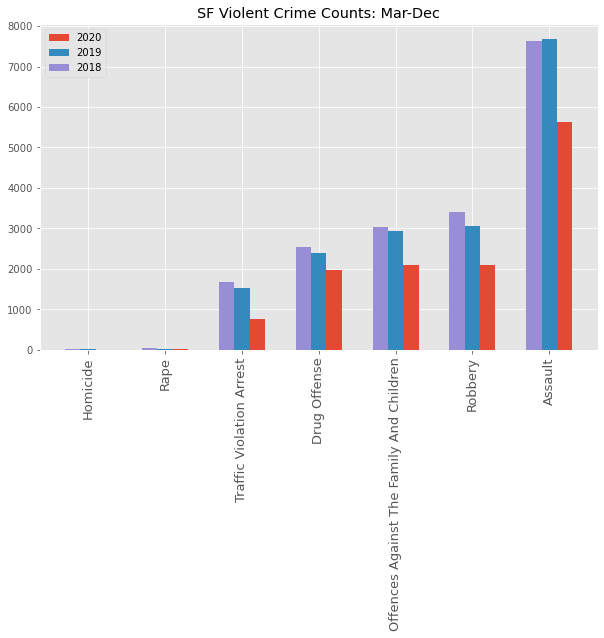

In [139]:
P.plot_violent_years(violent_ma_18, violent_ma_19, violent_ma_20);

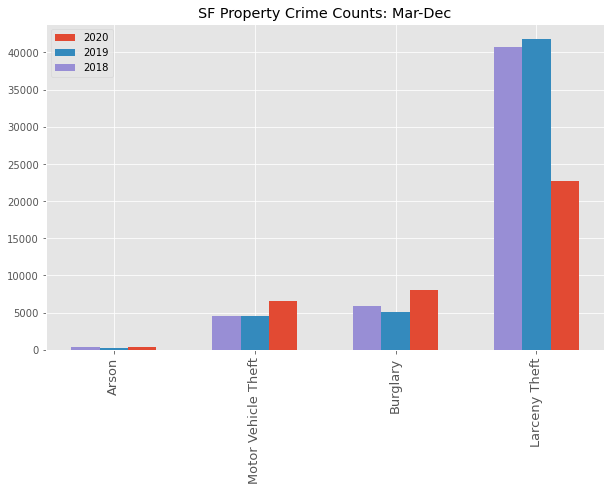

In [140]:
P.plot_prop_years(property_ma_18, property_ma_19, property_ma_20);